# Individual Assignment - Number 2
<br>
Dear course participant,

please find attached your individual assignment for the practical lecture number 2. You have one week to complete your individual task. Please use this Jupyter Notebook to implement the solution of your task and dont forget to write down some helpful comments! The comments are usefull for us to understand your thoughs while checking your solution to the given task. 

After completion, please rename this file in the following format: `iliasID_matrikelNr`. For example: `mmuster_11012345`<br>
You can rename this file through `File` $\to$ `Rename` on the navigation bar.

Upload your renamed file in ILU/.../Jelali - Machine Learning (ML)/Assignments/Individual Assignments <br>

Additional Information:<br>
If required, you can change the Kernel of this Notebook through `Kernel` $\to$ `Change Kernel` on the navigation bar.

**The assignment is due to 10.04.25 - 15:00**

*As a small reminder:*

**Do’s**
* Form study groups (with arbitrary number of people) $\to$ discuss and work on assignments in groups
    - learn from each other
    - Extensively use the internet (search engines e.g. google) and literature (papers, books, etc.) - knowledge is available everywhere! 
* Write down your own solutions 
* Write down the names of people with whom you’ve discussed the homework

**Don’ts**
* Copy solutions from others
* Plagiarism

Have fun implementing your own solution to this task! 

## Individual Task

In this weeks assignment, you have more freedom to work on your individual task. You already learned the basic concept of a pandas DataFrame and also some of the data handling operations. Building on this previous knowledge, your task for this week is to choose an interesting data set from the following resourses and analyze it using the methods you have already learned. You are also very welcome to use new functions that we didnt discuss during the lecture. In this case, add a short comment in your code to tell us why you used this function.

Please visit the following open-source online databases to select a `multivariate` data set for your assignment:
- http://archive.ics.uci.edu/ml/datasets.php
- https://www.kaggle.com/datasets
- https://www.quandl.com/search

**Please note:** 

Make sure that your data set contain structured data, e.g. time-series data. Dont select unstructured data sets such as images or text documents! 

Your data set can consist of numerical or mixed (numerical and categorical) attributes. But it must be a multivariate data set.

The selected data set does not have to be from the field of engineering. The most important thing is that you are interested in the data. If you are interested in the analysis of portuguese wine quality from 2009, be free to select a corresponding data set for this purpose!

**Recommendations**

- create a new folder for your assignment and download or copy your data set into the same folder as this jupyter notebook document
- if your downloaded data set contain multiple data set files, please select one file to work on your assignment. 
    - only analyze and upload one single data file.
- rename the folder in the same way as this document using `iliasID_matrikelNr`
- you can make a .zip archive of your folder and upload your folder. 
    - make sure it contains your selected data set and this jupyter notebook document, which contains your results


**Tasks**

You should perform the following small tasks to analyze your data set:
1. first of all describe in a markdown cell why you selected this particular data set. Explain why you find this data set interesting and what insights you would like to gain from it. Write a maximum of 10 sentences.
2. open your data set on your computer (e.g. with a text editor or microsoft excel) and take a look on the data structure 
3. import your data set into a pandas DataFrame by using the `read_csv()` function and make a copy of it using the `copy()` function. Work on the copy for your further analysis.
4. take a quick look into the DataFrame using the `head()`, `tail()` and `sample()` functions
5. print the data set information with pandas using the `info()` function
6. print the statistical description of the DataFrame using the `describe()` function
7. take a closer look into the individual column/attributes of the DataFrame. Create plots and histograms of selected attributes. (at least 2 attributes)
8. can you see any connections between the indiviual attributes? Use the `corr()` function of pandas to calculate the correlation matrix and the `heatmap()` function of seaborn to visualize the results
9. use the `boxplot()` function of seaborn to create boxplots
10. select three attributes from the data set and create a `multiple subplot` using matplotlib. The subplot should be used to visualize the course of all three attributes in separate plot functions embedded in a single figure. Use the following line of code to initialize your subplots: <br>`fig, (ax1, ax2, ax3) = plt.subplots(3, 1)`

At first glance, the tasks look like a lot of work. However, the individual sub-items are processed quickly. Remember that you will be working on very extensive project work in a few weeks and use this opportunity to improve your knowledge with the data science tools. Also dont forget to have fun! 

You have a lot of freedom in handling this weeks assignment. The work packages defined above must be processed. However, you can also edit other content at your own interest. Be creative!


**Please upload your jupyter notebook document AND your selected dataset in ILIAS after completion of your assignment!**

In [214]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

## Start working on your task here

In [215]:
# 1. Describe why you chose this data set
# Mushrooms are one of the most fascinating and versatile, but also least understoods organisms on our planet.
# The sheer amount of mushrooms types is immense. What's also interesting to me is how a small change in one particular shape 
# decides whether a certain mushroom is heavily poisonous or edible.

# I hope to gain more insights into the world of mushrooms from this data set and I am interested in what 
# clusters can be formed with different attributes that we would normally not correlate anything with. 

In [216]:
# 3. Importing and copying
# Disclaimer: Due to the large amount of attributes I will only pick a few. Nevertheless I will import all of them.
column_names = [
    "edible",                  # 0: edible=e, poisonous=p
    "cap_shape",               # 1: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    "cap_surface",             # 2: fibrous=f, grooves=g, scaly=y, smooth=s
    "cap_color",               # 3: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    "bruises",                 # 4: bruises=t, no=f
    "odor",                    # 5: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    "gill_attachment",         # 6: attached=a, descending=d, free=f, notched=n
    "gill_spacing",            # 7: close=c, crowded=w, distant=d
    "gill_size",               # 8: broad=b, narrow=n
    "gill_color",              # 9: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    "stalk_shape",             # 10: enlarging=e, tapering=t
    "stalk_root",              # 11: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    "stalk_surface_above_ring",# 12: fibrous=f, scaly=y, silky=k, smooth=s
    "stalk_surface_below_ring",# 13: fibrous=f, scaly=y, silky=k, smooth=s
    "stalk_color_above_ring",  # 14: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    "stalk_color_below_ring",  # 15: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    "veil_type",               # 16: partial=p, universal=u
    "veil_color",              # 17: brown=n, orange=o, white=w, yellow=y
    "ring_number",             # 18: none=n, one=o, two=t
    "ring_type",               # 19: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    "spore_print_color",       # 20: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    "population",              # 21: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    "habitat"                  # 22: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d
]

df = pd.read_csv('data/mushroom/agaricus-lepiota.data', 
                 names=column_names, 
                )

data = df.copy()

In [217]:
# 4. .head() and other functions
data.head()
data.tail()
data.sample()


,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
217,e,x,y,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,k,s,g


In [ ]:
# 5. Printing the data set information
#data.info() # the output "non-null count" is not truthful, as the dataset already compensates missing entries for the attribute "stalk-root" with "?"

# creating NaN entries:
count=(data.iloc[:, 11] =='?').sum()
data.iloc[:,11] = data.iloc[:,11].replace("?", np.nan) # replaces every "?" in column 11 (stalk-root) with "NaN" from numpy.
data.info() # Now column 11 shows less than 8124 Non-Null entries.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [219]:
# 6. Statistical description
data.describe()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


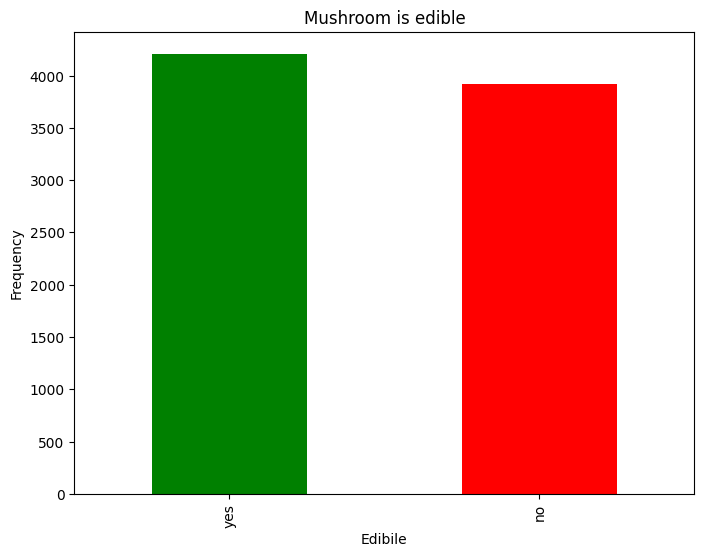

In [ ]:
# 7. Creating plots and histograms
#data["edible"].plot() # leads to an error, because the data set only has categorical values like "p" for poisonous or "e" for edible.
# -> Counting how many values there are is necessary

# Bar plot for Column 0 "edible"
data.iloc[:,0] = data.iloc[:,0].replace("e","yes") # replacing e with yes
data.iloc[:,0] = data.iloc[:,0].replace("p","no")  # replacing p with no

plt.figure(figsize=(8, 6))
data['edible'].value_counts().plot(kind='bar', color=["green", "red"], label='Edible')
plt.title('Mushroom is edible')
plt.xlabel('Edibile')
plt.ylabel('Frequency')
plt.show()

# Because the data has categorical values rather than numerical values. creating a histogram is not useful.


     b  c     x     f    k   s
0  452  4  3656  3152  828  32


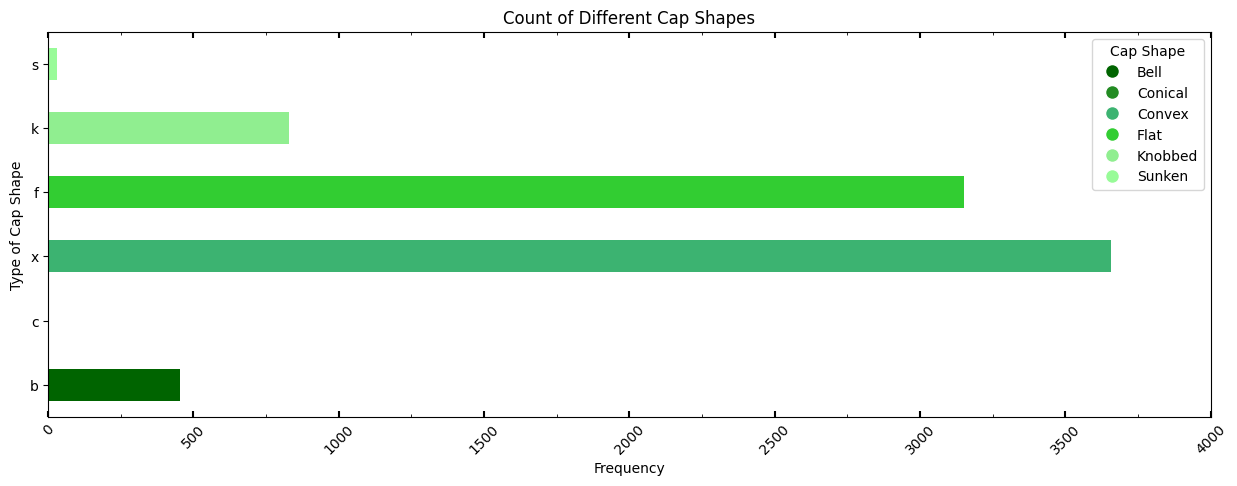

In [ ]:
# Plotting Column 1 as a barh plot
# A new df is created, because otherwise adding a legend will not be possible - at least I found no other way to do it like I wanted to

bell = (data.iloc[:, 1] =='b').sum()
conical = (data.iloc[:, 1] =='c').sum()
convex = (data.iloc[:, 1] =='x').sum()
flat = (data.iloc[:, 1] =='f').sum()
knobbed = (data.iloc[:, 1] =='k').sum()
sunken = (data.iloc[:, 1] =='s').sum()

cap_shape_dict = {
    'b': bell,
    'c': conical,
    'x': convex,
    'f': flat,
    'k': knobbed,
    's': sunken
}

cap_shape_df = pd.DataFrame([cap_shape_dict])
print(cap_shape_df) # df needs to be reshaped, currently only one column 
cap_shape_df = cap_shape_df.T # tranposes df


# Plotting
colors = ['darkgreen', 'forestgreen','mediumseagreen', 'limegreen',  'lightgreen', 'palegreen'] # different colors of green

ax = cap_shape_df.plot.barh(color=colors, legend=False) # the colors are somehow not applied

# work around
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

plt.title('Count of Different Cap Shapes')
plt.xlabel('Frequency')
plt.ylabel('Type of Cap Shape')
plt.xticks(rotation=45) # better visibility - rotates x-axis labels

# more formatting
main_ticks = range(0, max(cap_shape_df[0])+500, 500) # main ticks - 500 steps for x axis
plt.xticks(main_ticks)
minor_ticks = range(0, max(cap_shape_df[0])+500, 250) # minor ticks - 250 steps for x-axis 
ax.set_xticks(minor_ticks, minor=True)
ax.tick_params(axis='x', which='both', bottom=True, top=True, direction='in') # x-axis top and bottom
ax.tick_params(axis='x', which='major', length=4, width=1.5, direction='in')  # x-axis main ticks are thicker 

# legend formatting
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(handles, ['Bell', 'Conical', 'Convex', 'Flat', 'Knobbed', 'Sunken'], title='Cap Shape')

plt.show()

# fixing the legend display and colors took forever (~ 1 h +)


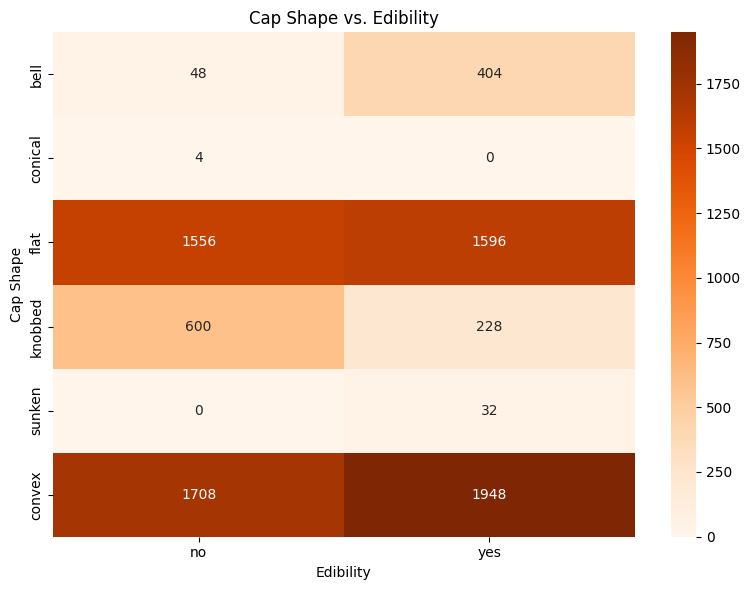

In [222]:
# 8.

# Create a cross-tabulation of cap_shape (column 1) vs. edible (column 0) to arrange the data in such a way that a heatmap can be created and corr() can be used
heatmap_data = pd.crosstab(data.iloc[:, 1], data.iloc[:, 0])

shape_names = {
    'b': 'bell',
    'c': 'conical',
    'x': 'convex',
    'f': 'flat',
    'k': 'knobbed',
    's': 'sunken'
}
heatmap_data.index = heatmap_data.index.map(shape_names)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Oranges', fmt='d')
plt.title('Cap Shape vs. Edibility')
plt.xlabel('Edibility')
plt.ylabel('Cap Shape')
plt.tight_layout()
plt.show()


# Looking into the heat map, bell-shaped mushrooms in nearly 85% of the cases seem to be not edible
# knobbed ones are more likely to be edible, but still more than 25% are poisonous.


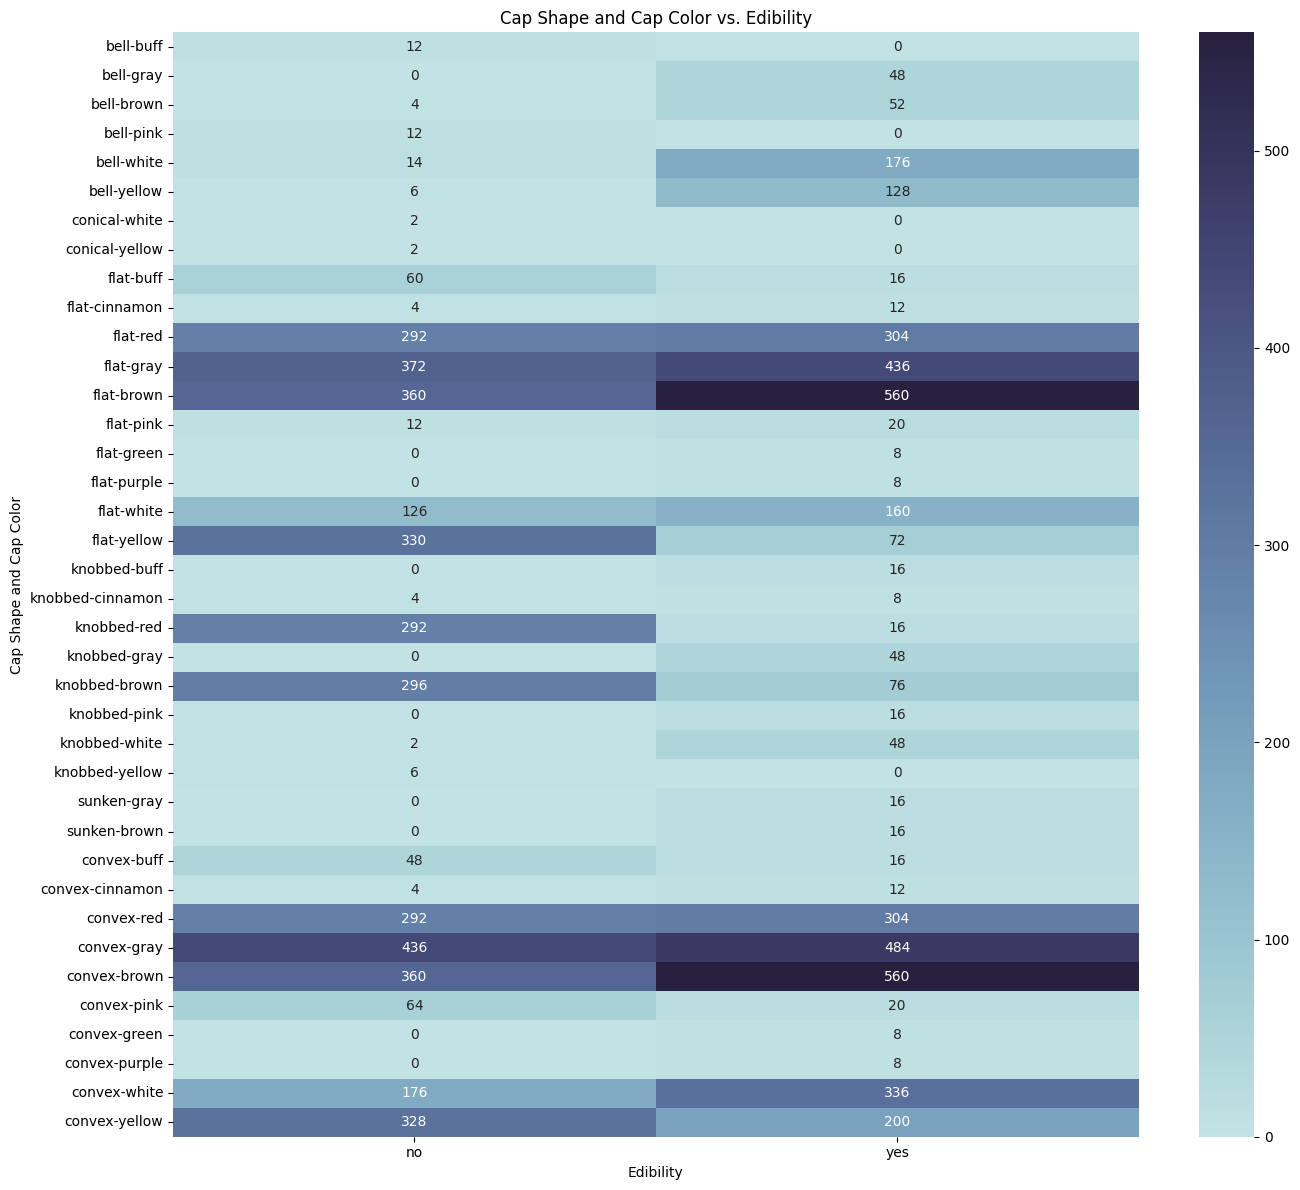

In [ ]:
# Creating a heatmap that analyzes edibility (column 0) vs. cap-shape (column 1) and the cap-color (column 3)
heatmap_data = pd.crosstab(index=[data.iloc[:, 1], data.iloc[:, 3]], columns=data.iloc[:, 0])

# Rename values for better readability
shape_names = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
color_names = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green',
    'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

# Apply spelled out names to the MultiIndex levels
new_index = heatmap_data.index.set_levels([
    heatmap_data.index.levels[0].map(shape_names),
    heatmap_data.index.levels[1].map(color_names)
])
heatmap_data.index = new_index

# Defining a custom color palette
custom_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Plotting and formatting the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, annot=True, cmap=custom_cmap, fmt='d')
plt.title('Cap Shape and Cap Color vs. Edibility')
plt.xlabel('Edibility')
plt.ylabel('Cap Shape and Cap Color')
plt.tight_layout()
plt.show()


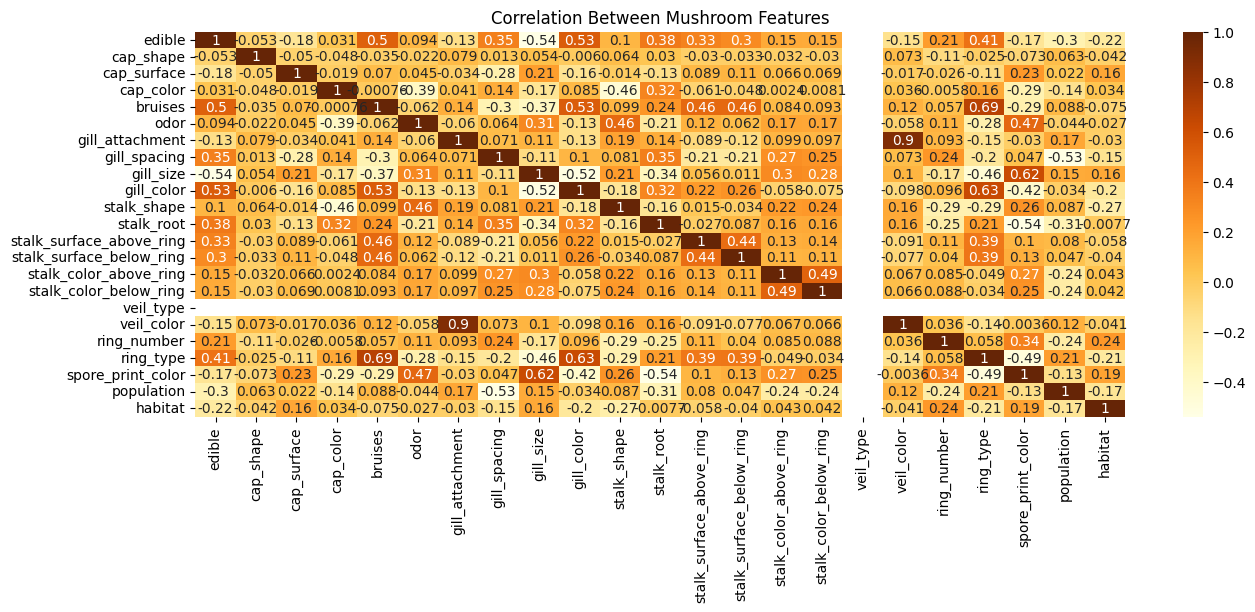

Looking at the heat map, it can be observed that there are no very strong positive correlations > 0.7 except for
the relationship between veil-color and gill-attachment with a correlation of 0.9.


In [ ]:
# To calculate the correlation between seperate values from different categories it is necessary
# to transform the letter-values into actual numbers.
data_numeric = data.copy()  # creates new dataframe 
for col in data_numeric.columns:
    data_numeric[col] = data_numeric[col].astype('category').cat.codes  # category-to-number conversion, meaning that 'b' in cape shape will 
                                                                        # e.g. be transformed into '1', 'convex' into '2' etc.;same goes for other attributes for the entire datset 

#print(data_numeric) # dataset now only includes numbers

corr_matrix = data_numeric.corr() # correlation can be calculated

# Plot correlation as heatmap
sns.heatmap(corr_matrix, cmap='YlOrBr', annot=True) # use colorpalette Yellow to Brown
plt.title('Correlation Between Mushroom Features')
plt.show()

print("Looking at the heat map, it can be observed that there are no very strong positive correlations > 0.7 except for" \
"\nthe relationship between veil-color and gill-attachment with a correlation of 0.9.")

#print(data_numeric["veil_type"])
#print(data_numeric.iloc[:,16].sum()) # 'veil_type' leaves a blank space, due to all of its entries being 0
#print((data.iloc[:,16]=='p').sum()) # -> cause: all of the original entries are 'p'


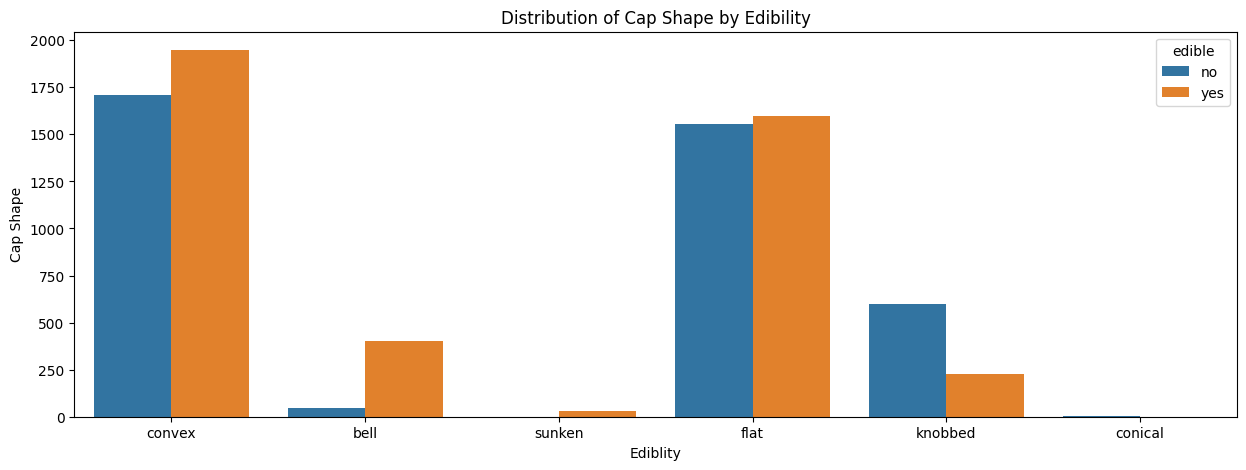

In [225]:
# 9. Creating a box-plot out of the numeric data:
#sns.boxplot(x='edible', y='cap_shape', data=data_numeric) # box plot holds little to no information with this type of data

labeled_data = data.copy() # using the previously defined shape_names dict the full names on the x-axis can be displayed
labeled_data['cap_shape'] = labeled_data['cap_shape'].map(shape_names)

sns.countplot(x='cap_shape', hue='edible', data=labeled_data)   # I found this 'paired bar' plot, which I think visualizes the 
                                                        # relationsip between edibility and cap shape better than the prevoius heatmap 
                                                          
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Cap Shape')
plt.show()

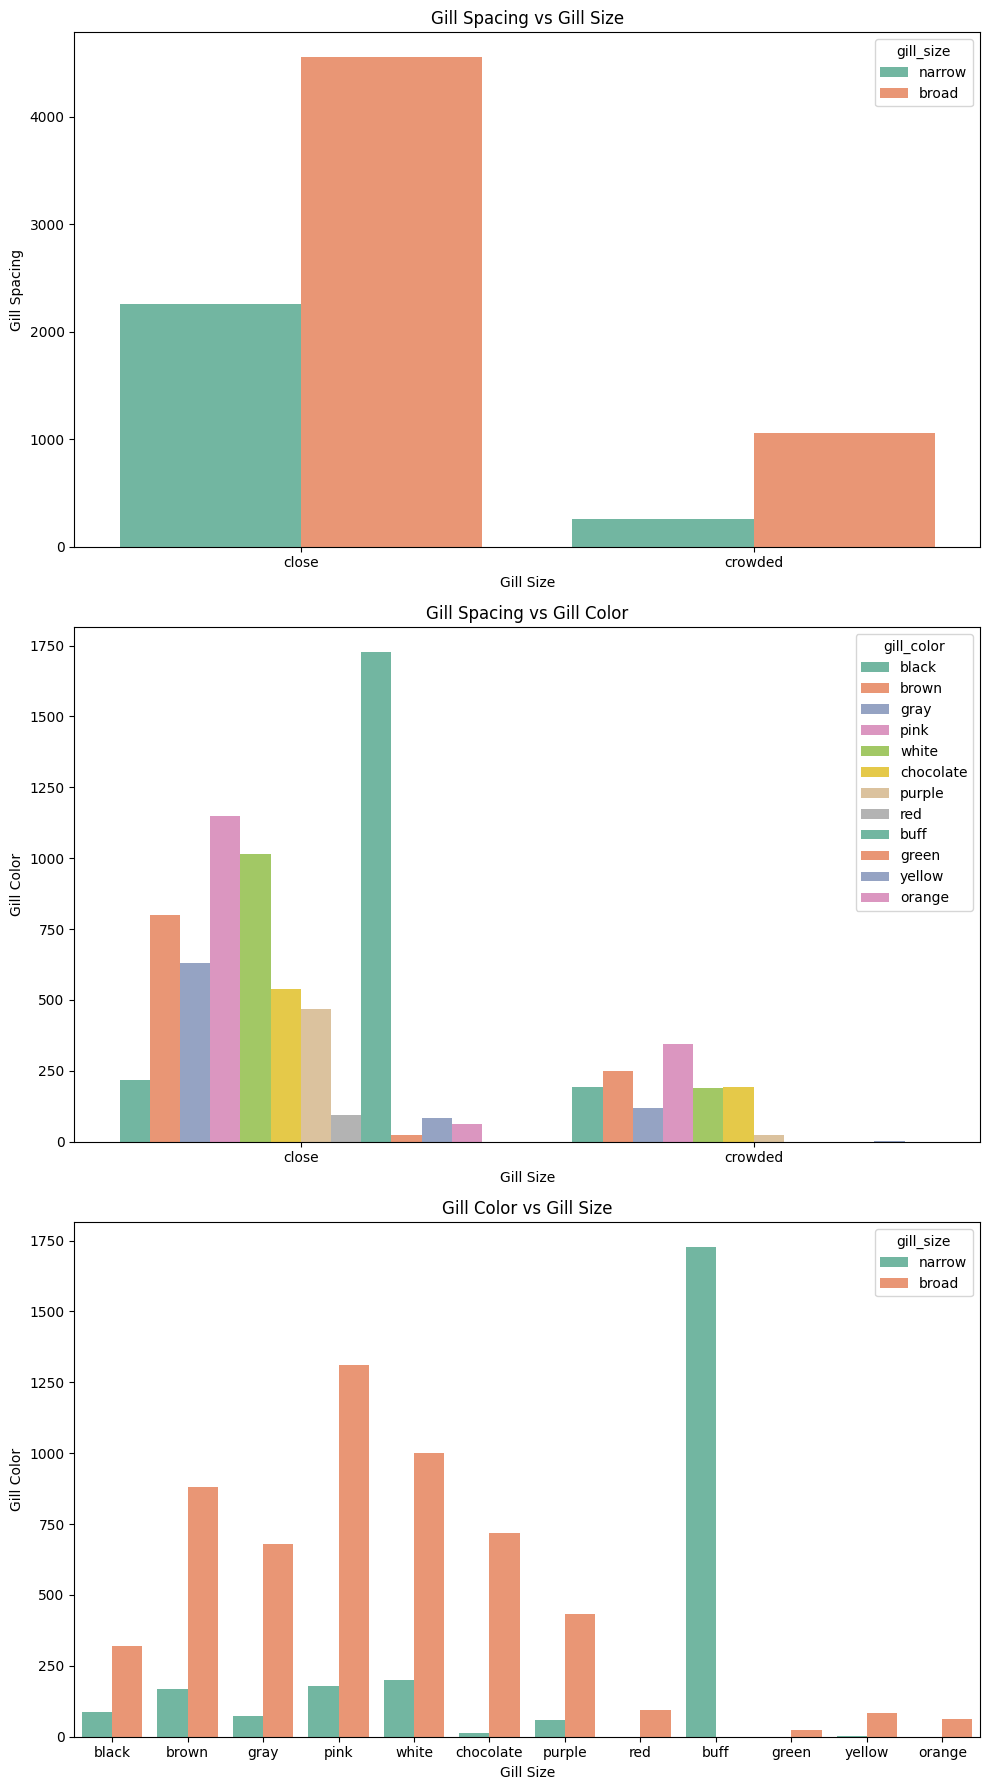

In [226]:
# 3 subplots with the attributes gill_spacing_gill_size and gill_color

fig, axes = plt.subplots(3, 1, figsize=(10, 18)) 

# Same method for labeling as used before
gill_spacing_dict = {
    'c': 'close',
    'w': 'crowded',
    'd': 'distant'
}

gill_size_dict = {
    'b': 'broad',
    'n': 'narrow'
}

gill_color_dict = {
    'k': 'black',
    'n': 'brown',
    'b': 'buff',
    'h': 'chocolate',
    'g': 'gray',
    'r': 'green',
    'o': 'orange',
    'p': 'pink',
    'u': 'purple',
    'e': 'red',
    'w': 'white',
    'y': 'yellow'
}

labeled_data['gill_spacing'] = labeled_data['gill_spacing'].map(gill_spacing_dict)
labeled_data['gill_size'] = labeled_data['gill_size'].map(gill_size_dict)
labeled_data['gill_color'] = labeled_data['gill_color'].map(gill_color_dict)

# Subplot 1: Gill Spacing vs Gill Size as a countplot
sns.countplot(x = 'gill_spacing', hue = 'gill_size', data=labeled_data, palette='Set2', ax=axes[0])
axes[0].set_title('Gill Spacing vs Gill Size')
axes[0].set_xlabel('Gill Size')
axes[0].set_ylabel('Gill Spacing')

# Subplot 2: Gill Spacing vs Gill color as a countplot
sns.countplot(x = 'gill_spacing', hue = 'gill_color', data=labeled_data, palette='Set2', ax=axes[1])
axes[1].set_title('Gill Spacing vs Gill Color')
axes[1].set_xlabel('Gill Size')
axes[1].set_ylabel('Gill Color')

# Subplot 2: Gill Color vs Gill Size as a countplot
sns.countplot(x = 'gill_color', hue = 'gill_size', data=labeled_data, palette='Set2', ax=axes[2])
axes[2].set_title('Gill Color vs Gill Size')
axes[2].set_xlabel('Gill Size')
axes[2].set_ylabel('Gill Color')

plt.tight_layout()
plt.show()